In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

data_df = pd.merge(trial_df, mouse_df, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [2]:
D1_df = data_df.loc[data_df["Drug"] == "Capomulin"]
D2_df = data_df.loc[data_df["Drug"] == "Ketapril"]
D3_df = data_df.loc[data_df["Drug"] == "Naftisol"]
D4_df = data_df.loc[data_df["Drug"] == "Stelasyn"]
D4_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
428,f234,0,45.000000,0,Stelasyn
429,f234,5,47.313491,0,Stelasyn
430,f234,10,47.904324,0,Stelasyn
431,f234,15,48.735197,1,Stelasyn
432,f234,20,51.112713,2,Stelasyn


In [3]:
Cmice_df = D1_df.groupby(['Timepoint']).count()
Cmice_df

,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug
Timepoint,,,,
0,25,25,25,25
5,25,25,25,25
10,25,25,25,25
15,24,24,24,24
20,23,23,23,23
25,22,22,22,22
30,22,22,22,22
35,22,22,22,22
40,21,21,21,21


## Tumor Response to Treatment

In [4]:
# treatment = ['Capomulin', 'Ketapril', 'Naftisol', 'Stelasyn']
CbyTime_df = D1_df.groupby(['Timepoint']).mean()
KbyTime_df = D2_df.groupby(['Timepoint']).mean()
NbyTime_df = D3_df.groupby(['Timepoint']).mean()
SbyTime_df = D4_df.groupby(['Timepoint']).mean()
SbyTime_df

,Tumor Volume (mm3),Metastatic Sites
Timepoint,,
0,45.000000,0.000000
5,47.527452,0.240000
10,49.463844,0.478261
15,51.529409,0.782609
20,54.067395,0.952381
25,56.166123,1.157895
30,59.826738,1.388889
35,62.440699,1.562500
40,65.356386,1.583333


In [5]:
yC_axis = CbyTime_df["Tumor Volume (mm3)"]
yK_axis = KbyTime_df["Tumor Volume (mm3)"]
yN_axis = NbyTime_df["Tumor Volume (mm3)"]
yS_axis = SbyTime_df["Tumor Volume (mm3)"]

yS_axis

Timepoint
0     45.000000
5     47.527452
10    49.463844
15    51.529409
20    54.067395
25    56.166123
30    59.826738
35    62.440699
40    65.356386
45    68.438310
Name: Tumor Volume (mm3), dtype: float64

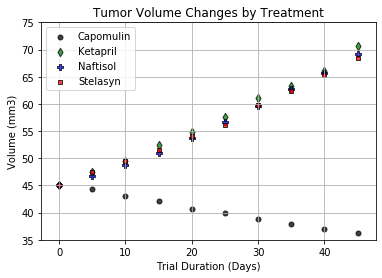

In [17]:
# plt.plot(tumor_df, marker = 'o')
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
plt.ylim(35, 75)
plt.scatter(x_axis, yC_axis, marker="o", facecolors="black", edgecolors="black", s = 25, alpha=0.75, label = 'Capomulin')
plt.scatter(x_axis, yK_axis, marker="d", facecolors="green", edgecolors="black", alpha=0.75, label = 'Ketapril')
plt.scatter(x_axis, yN_axis, marker="P", facecolors="blue", edgecolors="black", alpha=0.75, label = 'Naftisol')
plt.scatter(x_axis, yS_axis, marker="s", facecolors="red", edgecolors="black", s = 15, alpha=0.75, label = 'Stelasyn')

plt.title("Tumor Volume Changes by Treatment")
plt.xlabel("Trial Duration (Days)")
plt.ylabel("Volume (mm3)")
plt.legend()
plt.grid()
plt.savefig("Tumor_Vol.png")

In [7]:
# Show the Figure
plt.show()
plt.savefig("Tumor_Vol.png")

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [8]:
yCm_axis = CbyTime_df["Metastatic Sites"]
yKm_axis = KbyTime_df["Metastatic Sites"]
yNm_axis = NbyTime_df["Metastatic Sites"]
ySm_axis = SbyTime_df["Metastatic Sites"]

yCm_axis

Timepoint
0     0.000000
5     0.160000
10    0.320000
15    0.375000
20    0.652174
25    0.818182
30    1.090909
35    1.181818
40    1.380952
45    1.476190
Name: Metastatic Sites, dtype: float64

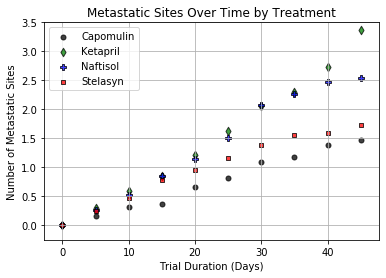

In [9]:
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
plt.ylim(-0.25, 3.5)
plt.scatter(x_axis, yCm_axis, marker="o", facecolors="black", edgecolors="black", s = 25, alpha=0.75, label = 'Capomulin')
plt.scatter(x_axis, yKm_axis, marker="d", facecolors="green", edgecolors="black", alpha=0.75, label = 'Ketapril')
plt.scatter(x_axis, yNm_axis, marker="P", facecolors="blue", edgecolors="black", alpha=0.75, label = 'Naftisol')
plt.scatter(x_axis, ySm_axis, marker="s", facecolors="red", edgecolors="black", s = 15, alpha=0.75, label = 'Stelasyn')

plt.title("Metastatic Sites Over Time by Treatment")
plt.xlabel("Trial Duration (Days)")
plt.ylabel("Number of Metastatic Sites")
plt.legend()
plt.grid()
plt.savefig("Met_Sites.png")

## Survival Rates

In [10]:
Cmice_df = D1_df.groupby(['Timepoint']).count()
Kmice_df = D2_df.groupby(['Timepoint']).count()
Nmice_df = D3_df.groupby(['Timepoint']).count()
Smice_df = D4_df.groupby(['Timepoint']).count()
Smice_df

,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug
Timepoint,,,,
0,26,26,26,26
5,25,25,25,25
10,23,23,23,23
15,23,23,23,23
20,21,21,21,21
25,19,19,19,19
30,18,18,18,18
35,16,16,16,16
40,12,12,12,12


In [11]:
yCmice_axis = Cmice_df["Mouse ID"] / Cmice_df.loc[0, "Mouse ID"] * 100
yKmice_axis = Kmice_df["Mouse ID"] / Kmice_df.loc[0, "Mouse ID"] * 100
yNmice_axis = Nmice_df["Mouse ID"] / Nmice_df.loc[0, "Mouse ID"] * 100
ySmice_axis = Smice_df["Mouse ID"] / Smice_df.loc[0, "Mouse ID"] * 100
ySmice_axis

Timepoint
0     100.000000
5      96.153846
10     88.461538
15     88.461538
20     80.769231
25     73.076923
30     69.230769
35     61.538462
40     46.153846
45     42.307692
Name: Mouse ID, dtype: float64

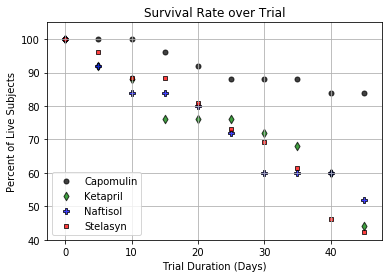

In [12]:
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
plt.ylim(40, 105)
plt.scatter(x_axis, yCmice_axis, marker="o", facecolors="black", edgecolors="black", s = 25, alpha=0.75, label = 'Capomulin')
plt.scatter(x_axis, yKmice_axis, marker="d", facecolors="green", edgecolors="black", alpha=0.75, label = 'Ketapril')
plt.scatter(x_axis, yNmice_axis, marker="P", facecolors="blue", edgecolors="black", alpha=0.75, label = 'Naftisol')
plt.scatter(x_axis, ySmice_axis, marker="s", facecolors="red", edgecolors="black", s = 15, alpha=0.75, label = 'Stelasyn')

plt.title("Survival Rate over Trial")
plt.xlabel("Trial Duration (Days)")
plt.ylabel("Percent of Live Subjects")
plt.legend(loc="lower left")
plt.grid()
plt.savefig("Survival_Rate.png")

In [13]:
plt.show()

## Summary Bar Graph

In [14]:
yS_axis

Ctumor_df = pd.DataFrame(yC_axis)
Ktumor_df = pd.DataFrame(yK_axis)
Ntumor_df = pd.DataFrame(yN_axis)
Stumor_df = pd.DataFrame(yS_axis)

Ktumor_df

tumor_df = pd.merge(Ctumor_df, Ktumor_df, on = "Timepoint")
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)_x": "TV - C", "Tumor Volume (mm3)_y": "TV - K"})
tumor_df = pd.merge(tumor_df, Ntumor_df, on = "Timepoint")
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "TV - N"})
tumor_df = pd.merge(tumor_df, Stumor_df, on = "Timepoint")
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "TV - S"})
tumor_df

,TV - C,TV - K,TV - N,TV - S
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,46.796098,47.527452
10,43.084291,49.582269,48.694210,49.463844
15,42.064317,52.399974,50.933018,51.529409
20,40.716325,54.920935,53.644087,54.067395
25,39.939528,57.678982,56.731968,56.166123
30,38.769339,60.994507,59.559509,59.826738
35,37.816839,63.371686,62.685087,62.440699
40,36.958001,66.068580,65.600754,65.356386


In [15]:
Ctumor_change = (- tumor_df.loc[0, "TV - C"] + tumor_df.loc[45, "TV - C"]) / tumor_df.loc[0, "TV - C"] * 100
Ktumor_change = (- tumor_df.loc[0, "TV - K"] + tumor_df.loc[45, "TV - K"]) / tumor_df.loc[0, "TV - K"] * 100
Ntumor_change = (- tumor_df.loc[0, "TV - N"] + tumor_df.loc[45, "TV - N"]) / tumor_df.loc[0, "TV - N"] * 100
Stumor_change = (- tumor_df.loc[0, "TV - S"] + tumor_df.loc[45, "TV - S"]) / tumor_df.loc[0, "TV - S"] * 100
Ctumor_change, Ktumor_change, Ntumor_change, Stumor_change

(-19.475302667894155,
 57.02879468660604,
 53.923347134769195,
 52.085134287898995)

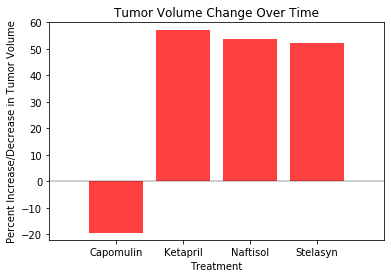

In [16]:
treatments = ['Capomulin', 'Ketapril', 'Naftisol', 'Stelasyn']
tumor_volume_change = [-19.5, 57.0, 53.9, 52.1]
# 'Ctumor_change', 'Ktumor_change', 'Ntumor_change', 'Stumor_change'

x_axis = np.arange(0, len(treatments))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Tumor Volume Change Over Time")
plt.xlabel("Treatment")
plt.ylabel("Percent Increase/Decrease in Tumor Volume")

plt.xlim(-1, 4)
plt.ylim(-22, 60)

plt.bar(x_axis, tumor_volume_change, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, treatments)
plt.hlines(0, -1, 10, alpha=0.25)
plt.savefig("Tumor_Vol_Change.png")
plt.show()